In [1]:
import cppyy
import cppyy.gbl as cpp
from cppyy.gbl import std

from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

2023-02-13 18:42:14.234911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 18:42:14.849321: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 18:42:14.849344: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-13 18:42:16.118948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-1

In [2]:
cppyy.include('src/value.hpp')
cppyy.include('src/module.hpp')
cppyy.include('src/utils.hpp')

True

In [3]:
model = cpp.MLP[float]([2, 2, 2, 2])

In [4]:
inp = std.vector[float]({2.0, 5.0})
out = std.vector[float]({1.0, 0.0})

In [5]:
for i in range(50):
    loss = model.loss(inp, out)
    loss.backward()
    model.descend_grad()
    model.zero_grad()
print(f"Output: {model(inp)}\nLoss: {loss}\n\n")

Output: Vector(Value(1.19209e-07, 0), Value(1, 0))
Loss: Value(1.42109e-14, 1)




In [6]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

3


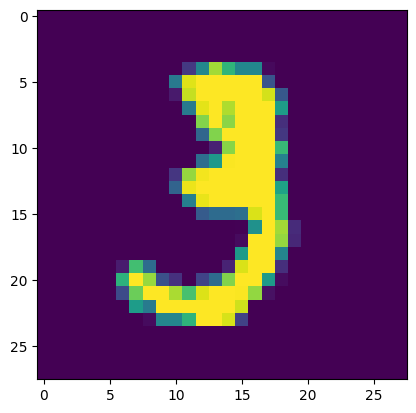

In [7]:
test_ind = 10
plt.imshow(train_X[test_ind])
print(train_y[test_ind])

In [8]:
train_X[0].flatten().shape

(784,)

In [9]:
"""
mnist_model = cpp.MLP[float]([784, 16, 16, 10])
BATCH = 32
CYCLES = 100

for i in range(CYCLES):
    mnist_model.zero_grad()
    
    for j in range(BATCH):
        ind = np.random.randint(0, train_X.shape[0])
        inp = std.vector[float]()
        [inp.push_back(float(x)) for x in train_X[ind].flatten()]
        out = std.vector[float]()
        [out.push_back(0) for _ in range(10)]
        out[int(train_y[ind])] = 1.0
        
        loss = mnist_model.loss(inp, out)
        loss.backward()
        
    mnist_model.descend_grad()
"""

'\nmnist_model = cpp.MLP[float]([784, 16, 16, 10])\nBATCH = 32\nCYCLES = 100\n\nfor i in range(CYCLES):\n    mnist_model.zero_grad()\n    \n    for j in range(BATCH):\n        ind = np.random.randint(0, train_X.shape[0])\n        inp = std.vector[float]()\n        [inp.push_back(float(x)) for x in train_X[ind].flatten()]\n        out = std.vector[float]()\n        [out.push_back(0) for _ in range(10)]\n        out[int(train_y[ind])] = 1.0\n        \n        loss = mnist_model.loss(inp, out)\n        loss.backward()\n        \n    mnist_model.descend_grad()\n'

In [10]:
with open("mnist_train_images.txt", "w") as file:
    for image in train_X:
        file.write(" ".join([str(x) for x in image.flatten()]))
        file.write("\n")

with open("mnist_train_labels.txt", "w") as file:
    for label in train_y:
        file.write(str(label))
        file.write("\n")

with open("mnist_test_images.txt", "w") as file:
    for image in test_X:
        file.write(" ".join([str(x) for x in image.flatten()]))
        file.write("\n")

with open("mnist_test_labels.txt", "w") as file:
    for label in test_y:
        file.write(str(label))
        file.write("\n")